In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon, dirichlet, beta
from scipy import special
from mpl_toolkits.mplot3d import Axes3D

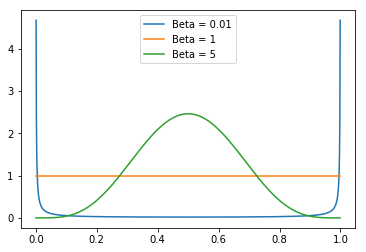

In [3]:
betas = [
    [0.01, 0.01],
    [1, 1],
    [5, 5]
]

seq = np.arange(0, 1, 0.001)

for b in betas:
    plt.plot(seq, beta.pdf(seq, b[0], b[1]), label='Beta = ' + str(b[0]))
    
plt.legend()
plt.show()

P theta < 0.5 = 0.7490397188646494
P theta < 0.5 = 0.6875
P theta < 0.5 = 0.6127929687499998


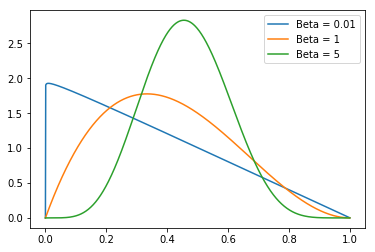

In [5]:
up = 1
down = 2

for b in betas:
    plt.plot(seq, beta.pdf(seq, b[0] + up, b[1] + down), label='Beta = ' + str(b[0]))
    print('P theta < 0.5 = ' + str(beta.cdf(seq, b[0] + up, b[1] + down)[len(seq) // 2]))
    
plt.legend()
plt.show()


P theta < 0.5 = 0.9679849403227562
P theta < 0.5 = 0.9622406512498856
P theta < 0.5 = 0.9392752575222403


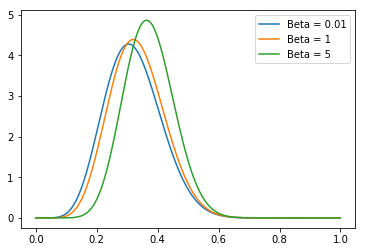

In [7]:
up = 8
down = 17

for b in betas:
    plt.plot(seq, beta.pdf(seq, b[0] + up, b[1] + down), label='Beta = ' + str(b[0]))
    print('P theta < 0.5 = ' + str(beta.cdf(seq, b[0] + up, b[1] + down)[len(seq) // 2]))
    
plt.legend()
plt.show()


In [8]:

def beta_binomial(n, k, b, a):
    return special.comb(n, k) * (special.beta(k + a, n - k + b) / special.beta(a, b))


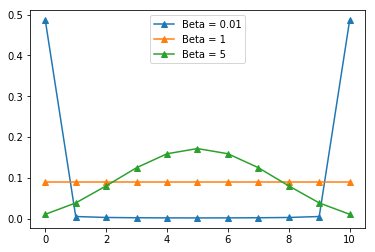

In [9]:
m = 10
points = range(11)

for b in betas:
    evs = [ beta_binomial(10, x, b[0], b[1]) for x in points ]
    plt.plot(points, evs, marker='^', label='Beta = ' + str(b[0]))
    
plt.legend()
plt.show()

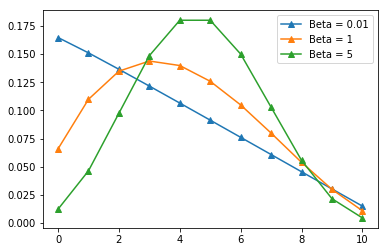

In [10]:
m = 10
points = range(11)

for b in betas:
    evs = [ beta_binomial(10, x, b[0] + 2, b[1] + 1) for x in points ]
    plt.plot(points, evs, marker='^', label='Beta = ' + str(b[0]))
    
plt.legend()
plt.show()

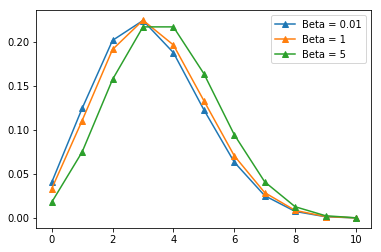

In [11]:
m = 10
points = range(11)

for b in betas:
    evs = [ beta_binomial(10, x, b[0] + down, b[1] + up) for x in points ]
    plt.plot(points, evs, marker='^', label='Beta = ' + str(b[0]))
    
plt.legend()
plt.show()

In [12]:
print('For three ' + str(beta.ppf([0.025, 0.975], 2, 3)))

print('For five and twenty ' + str(beta.ppf([0.025, 0.975], 1 + up, 1+ down )))




For three [0.06758599 0.80587955]
For five and twenty [0.17214414 0.51789644]


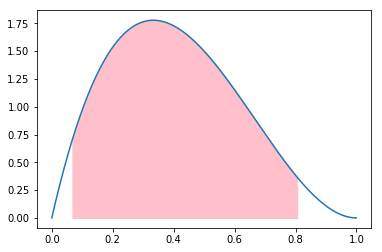

In [13]:
ppf = beta.ppf([0.025, 0.975], 2, 3)
pdf = beta.pdf(seq, 2, 3)
plt.plot(seq, beta.pdf(seq, 2, 3))
section = np.arange(ppf[0], ppf[1], step=0.001)
plt.fill_between(section, beta.pdf(section, 2, 3), color='pink')
plt.show( )

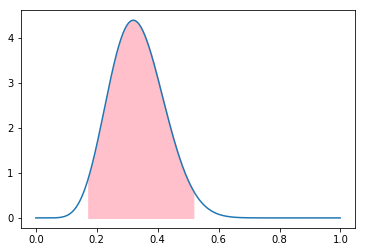

In [14]:
ppf = beta.ppf([0.025, 0.975], 1 + up, 1 + down)

plt.plot(seq, beta.pdf(seq, 1 + up,  1 + down))
section = np.arange(ppf[0], ppf[1], step=0.001)
plt.fill_between(section, beta.pdf(section, 1 + up, 1 + down), color='pink')
plt.show( )